<a href="https://colab.research.google.com/github/Adrita0808/survival_analysis_colorectalCancer_metastasis/blob/main/Colorectal_Cancer_Metastasis_SurvialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=8369d2369e369a6bad16d876dcd28335bc097411fda09674c28e57613f3a26a3
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter, KaplanMeierFitter


In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Assuming the file is a CSV, read it into a DataFrame
file_path = next(iter(uploaded))  # Get the file name of the uploaded file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


Saving ColorectalCancer-FilteredData.csv to ColorectalCancer-FilteredData.csv


,Patient ID,Age at Diagnosis,Metastasectomy,Metastases Site First: Bone,Metastases Site First: Brain,Metastases Site First: Gynecological,Metastases Site First: Liver,Metastases Site First: Ln,Metastases Site First: Lung,Metastases Site First: Pelvis,"Metastases Site First: Peritoneum, omentum, abdomen",Overall Survival Status,Stage At Diagnosis,Sex,Chemo Exposure of sequenced specimen,Overall Survival (Months)
0,P-0000119,67,0,0,0,0,1,0,0,0,1,1:DECEASED,IV,Female,Yes,27.37
1,P-0000241,49,0,0,0,0,1,0,0,0,0,1:DECEASED,IV,Female,Yes,24.00
2,P-0000493,24,0,0,0,0,1,0,0,0,0,1:DECEASED,IV,Male,Yes,23.87
3,P-0000511,39,0,0,0,1,0,0,0,0,1,1:DECEASED,IV,Female,Yes,23.27
4,P-0000520,64,1,0,0,0,0,0,0,0,1,0:LIVING,II,Male,No,41.50


In [ ]:
# Load the newly uploaded dataset
file_path_new = '/content/ColorectalCancer-FilteredData.csv'
df_new = pd.read_csv(file_path_new)

# Drop the column "Chemo Exposure of sequenced specimen"
df_new_dropped = df_new.drop(columns=["Chemo Exposure of sequenced specimen"])

# Display the first few rows of the updated dataframe
df_new_dropped.head()


,Patient ID,Age at Diagnosis,Metastasectomy,Metastases Site First: Bone,Metastases Site First: Brain,Metastases Site First: Gynecological,Metastases Site First: Liver,Metastases Site First: Ln,Metastases Site First: Lung,Metastases Site First: Pelvis,"Metastases Site First: Peritoneum, omentum, abdomen",Overall Survival Status,Stage At Diagnosis,Sex,Overall Survival (Months)
0,P-0000119,67,0,0,0,0,1,0,0,0,1,1:DECEASED,IV,Female,27.37
1,P-0000241,49,0,0,0,0,1,0,0,0,0,1:DECEASED,IV,Female,24.00
2,P-0000493,24,0,0,0,0,1,0,0,0,0,1:DECEASED,IV,Male,23.87
3,P-0000511,39,0,0,0,1,0,0,0,0,1,1:DECEASED,IV,Female,23.27
4,P-0000520,64,1,0,0,0,0,0,0,0,1,0:LIVING,II,Male,41.50


In [ ]:
# Check for missing values in the dataset
missing_data = df_new_dropped.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_data / len(df_new_dropped)) * 100

# Display columns with missing values
missing_data, missing_percentage


(Patient ID                                               0
 Age at Diagnosis                                         0
 Metastasectomy                                           0
 Metastases Site First: Bone                              0
 Metastases Site First: Brain                             0
 Metastases Site First: Gynecological                     0
 Metastases Site First: Liver                             0
 Metastases Site First: Ln                                0
 Metastases Site First: Lung                              0
 Metastases Site First: Pelvis                            0
 Metastases Site First: Peritoneum, omentum, abdomen      0
 Overall Survival Status                                  0
 Stage At Diagnosis                                       0
 Sex                                                      0
 Overall Survival (Months)                              121
 dtype: int64,
 Patient ID                                              0.000000
 Age at Diagnosis  

In [ ]:
# Drop rows where 'Overall Survival (Months)' is missing
df_cleaned = df_new_dropped.dropna(subset=['Overall Survival (Months)'])

# Check the remaining data after dropping rows
df_cleaned.head()


,Patient ID,Age at Diagnosis,Metastasectomy,Metastases Site First: Bone,Metastases Site First: Brain,Metastases Site First: Gynecological,Metastases Site First: Liver,Metastases Site First: Ln,Metastases Site First: Lung,Metastases Site First: Pelvis,"Metastases Site First: Peritoneum, omentum, abdomen",Overall Survival Status,Stage At Diagnosis,Sex,Overall Survival (Months)
0,P-0000119,67,0,0,0,0,1,0,0,0,1,1:DECEASED,IV,Female,27.37
1,P-0000241,49,0,0,0,0,1,0,0,0,0,1:DECEASED,IV,Female,24.00
2,P-0000493,24,0,0,0,0,1,0,0,0,0,1:DECEASED,IV,Male,23.87
3,P-0000511,39,0,0,0,1,0,0,0,0,1,1:DECEASED,IV,Female,23.27
4,P-0000520,64,1,0,0,0,0,0,0,0,1,0:LIVING,II,Male,41.50


In [ ]:
# After dropping rows with missing values in 'Overall Survival (Months)', check the number of remaining rows
remaining_rows = df_new_dropped.shape[0]

# Display the number of remaining rows
remaining_rows


1134

In [ ]:
df_cleaned['Overall Survival Status'] = df_cleaned['Overall Survival Status'].apply(lambda x: 1 if 'DECEASED' in x else 0)
df_cleaned['Overall Survival Status'].value_counts()


<ipython-input-9-6bdd056422a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Overall Survival Status'] = df_cleaned['Overall Survival Status'].apply(lambda x: 1 if 'DECEASED' in x else 0)


,count
Overall Survival Status,
0,649
1,364


In [ ]:
df_cleaned['Stage At Diagnosis'].value_counts()

,count
Stage At Diagnosis,
IV,685
III,225
II,80
I,23


In [ ]:
df_cleaned['Sex'].value_counts()

,count
Sex,
Male,541
Female,472


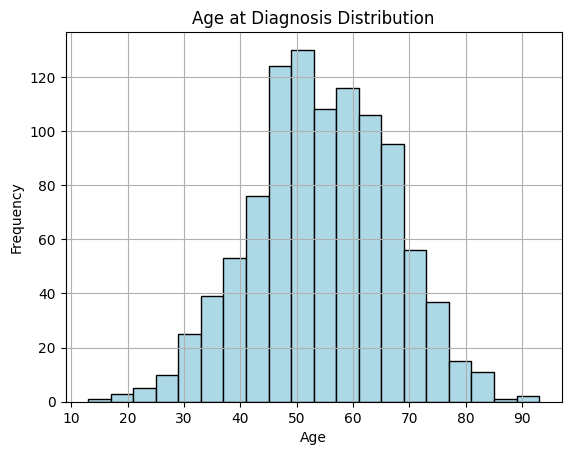

In [ ]:
#Visualizing the Distribution of Numerical Variables (Age and Survival Months)

import matplotlib.pyplot as plt
df_cleaned['Age at Diagnosis'].hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Age at Diagnosis Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


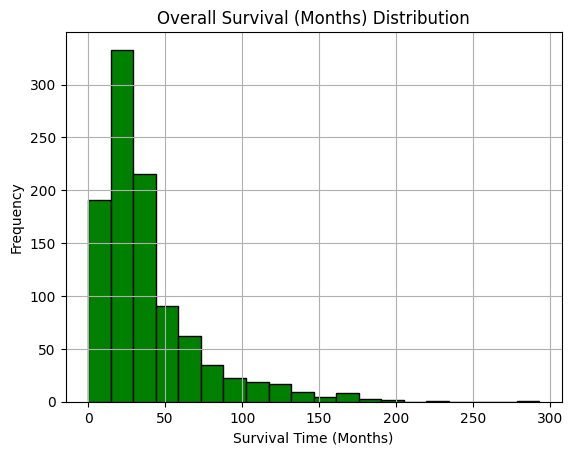

In [ ]:
df_cleaned['Overall Survival (Months)'].hist(bins=20, color='green', edgecolor='black')
plt.title('Overall Survival (Months) Distribution')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Frequency')
plt.show()


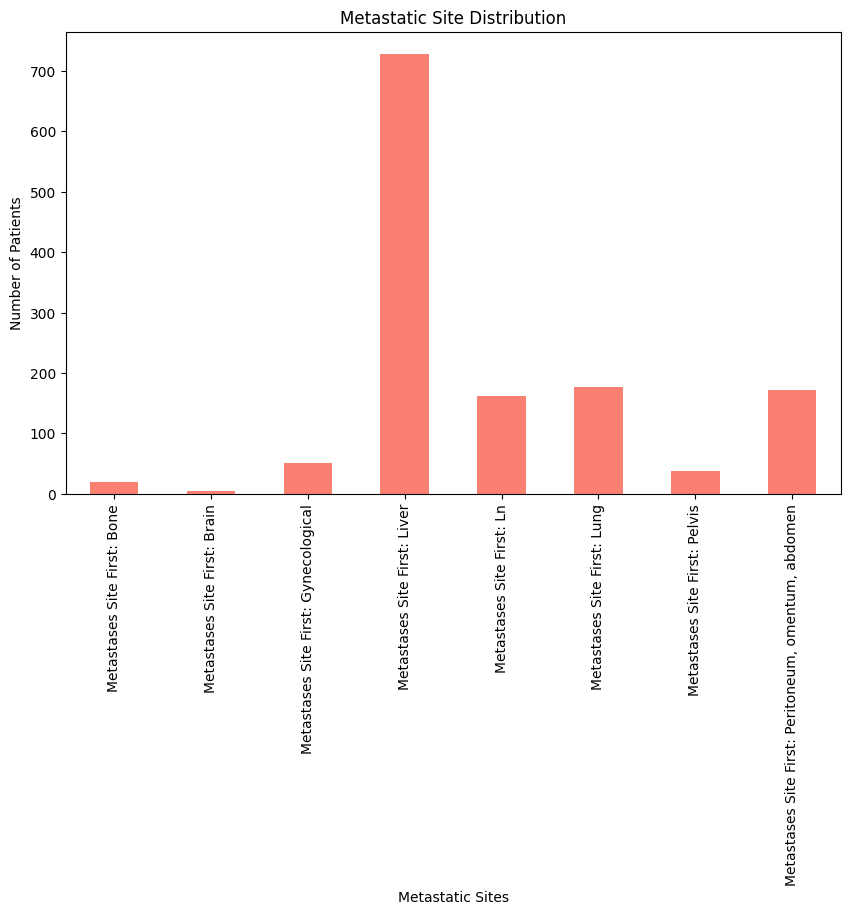

In [ ]:
metastasis_columns = [col for col in df_cleaned.columns if 'Metastases Site First' in col]
metastasis_counts = df_cleaned[metastasis_columns].sum()

metastasis_counts.plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Metastatic Site Distribution')
plt.xlabel('Metastatic Sites')
plt.ylabel('Number of Patients')
plt.show()


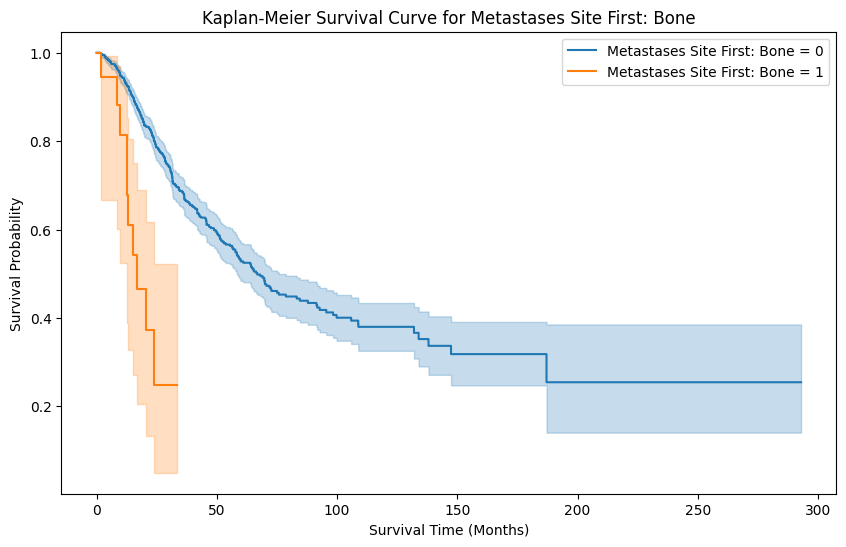

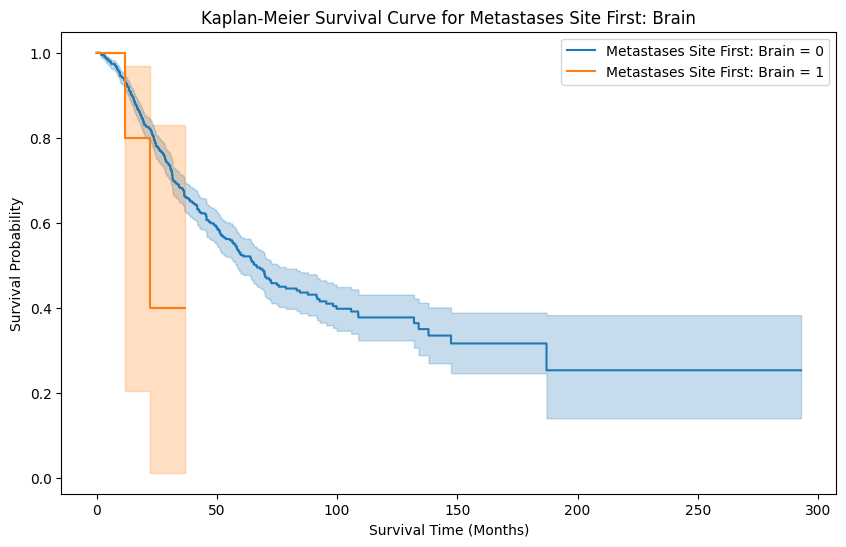

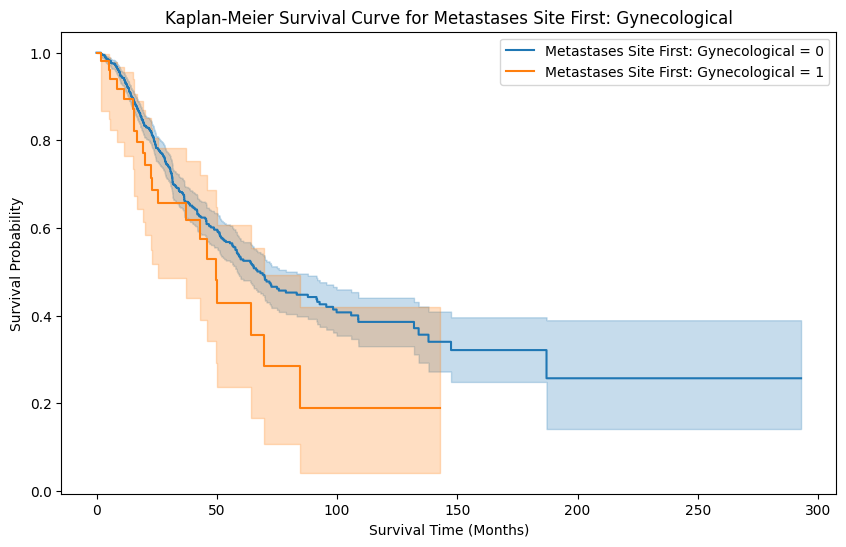

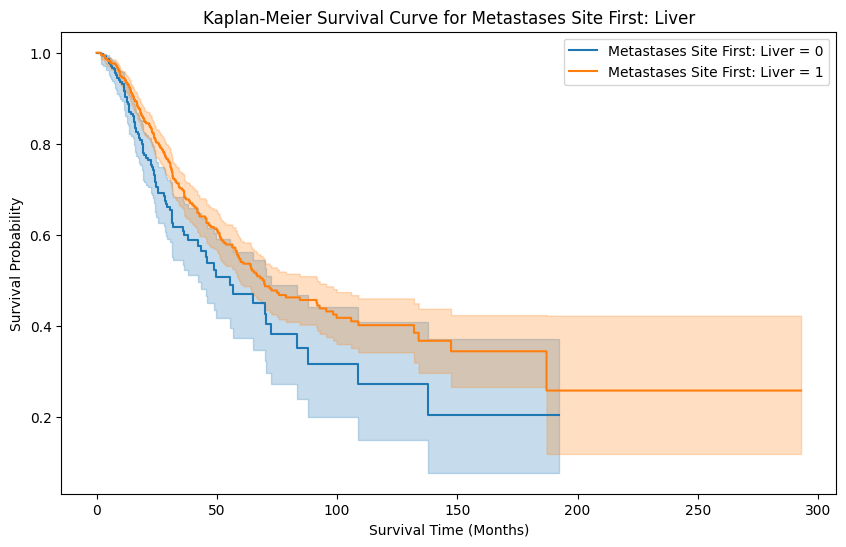

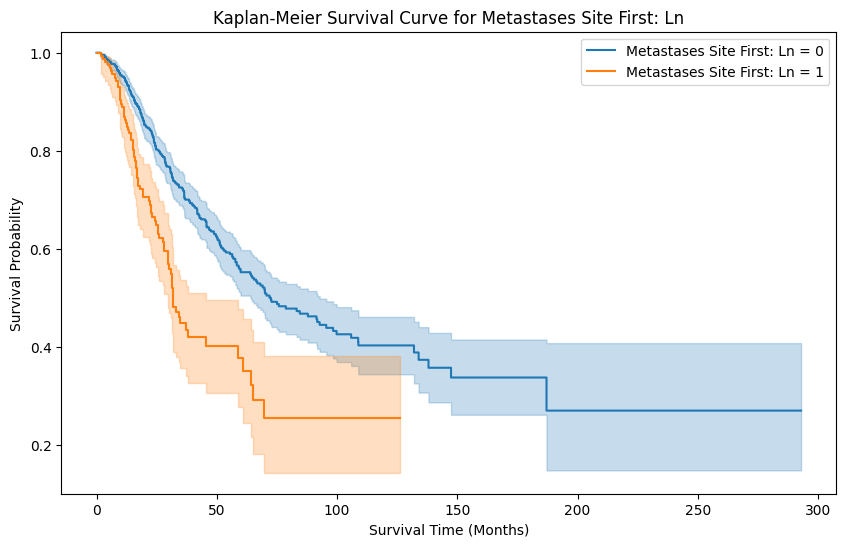

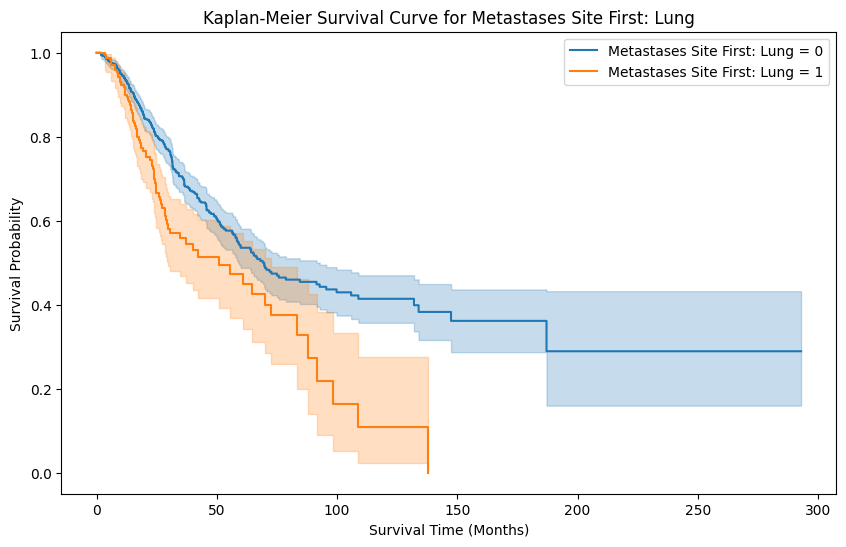

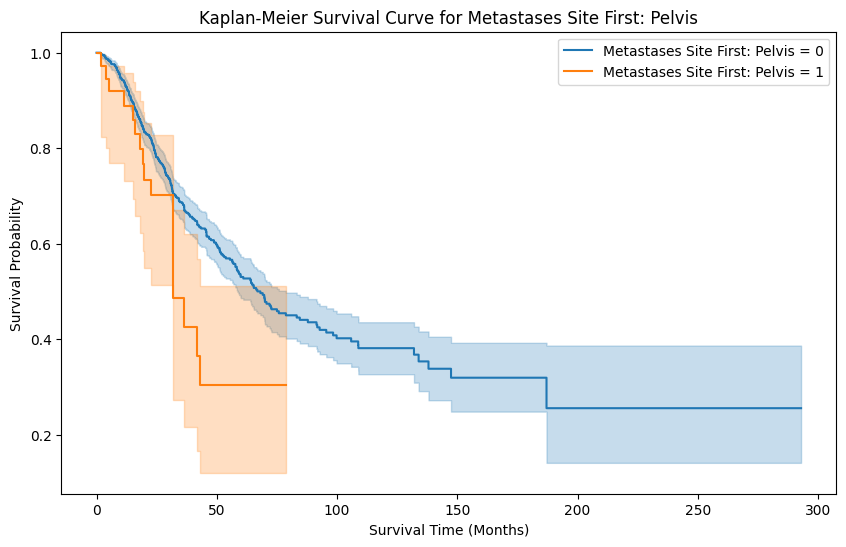

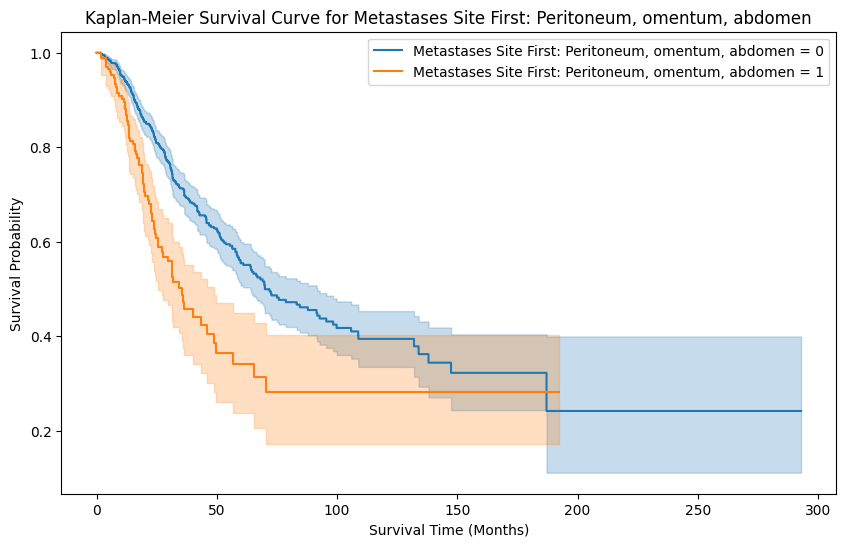

In [ ]:
# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Loop through each metastatic site and plot the survival curve separately
metastasis_columns = [col for col in df_cleaned.columns if 'Metastases Site First' in col]
for metastasis_column in metastasis_columns:
    plt.figure(figsize=(10, 6))  # Create a new figure for each metastatic site
    for value in [0, 1]:  # 0 = No, 1 = Yes
        kmf.fit(df_cleaned.loc[df_cleaned[metastasis_column] == value, 'Overall Survival (Months)'],
                event_observed=df_cleaned.loc[df_cleaned[metastasis_column] == value, 'Overall Survival Status'],
                label=f'{metastasis_column} = {value}')
        kmf.plot()

    plt.title(f'Kaplan-Meier Survival Curve for {metastasis_column}')
    plt.xlabel('Survival Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show()


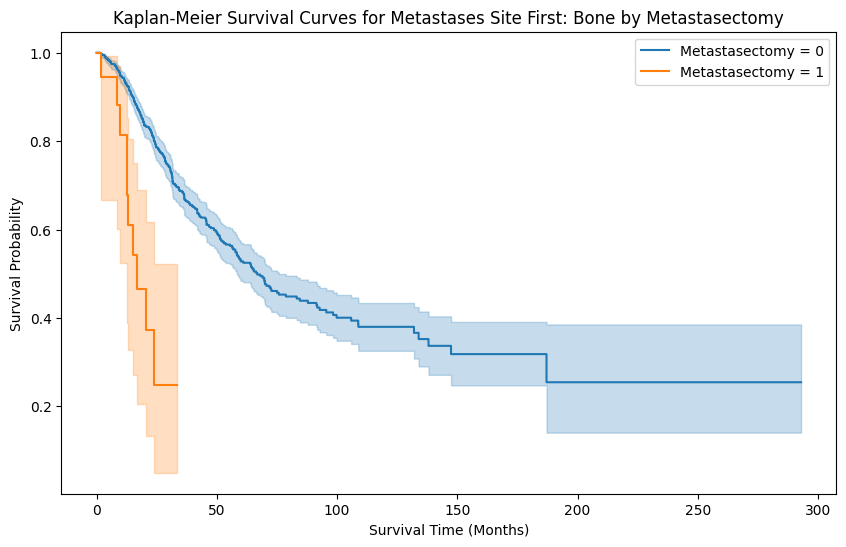

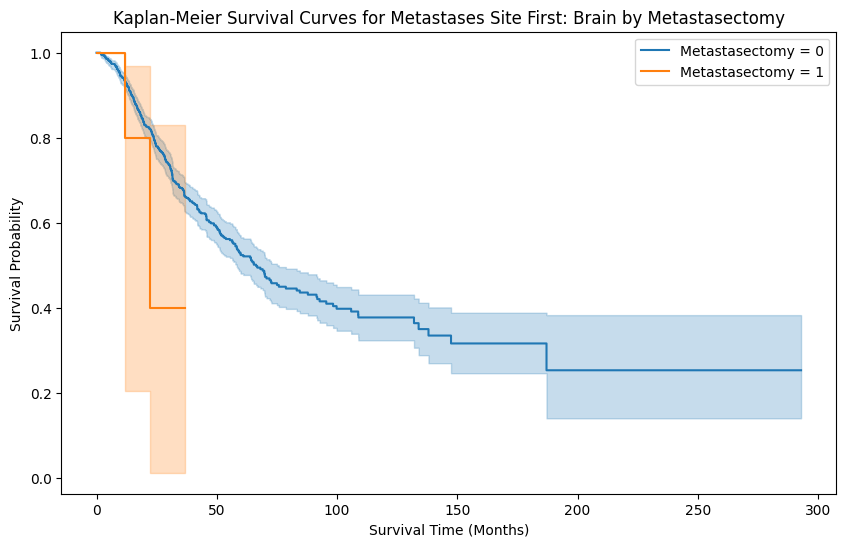

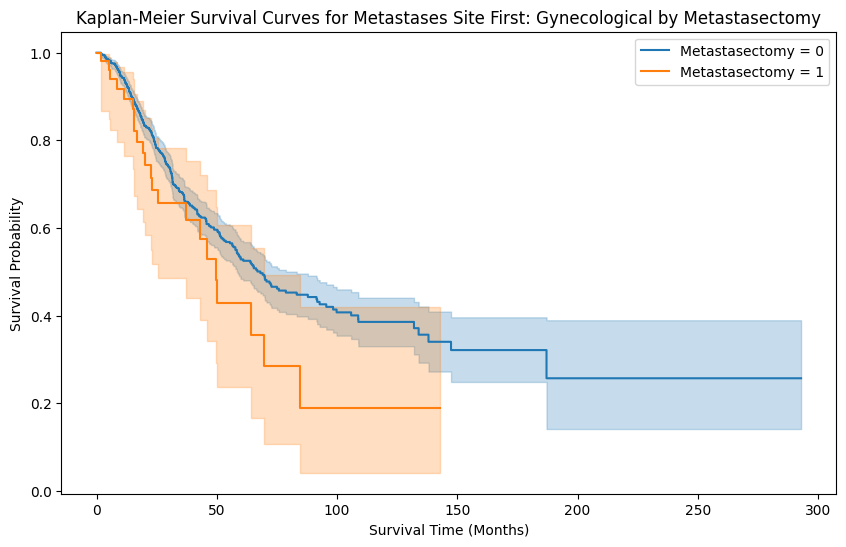

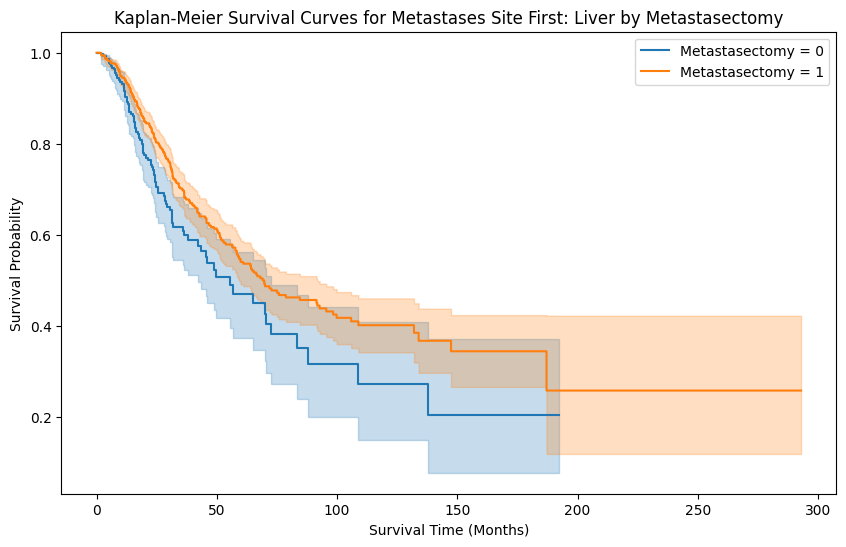

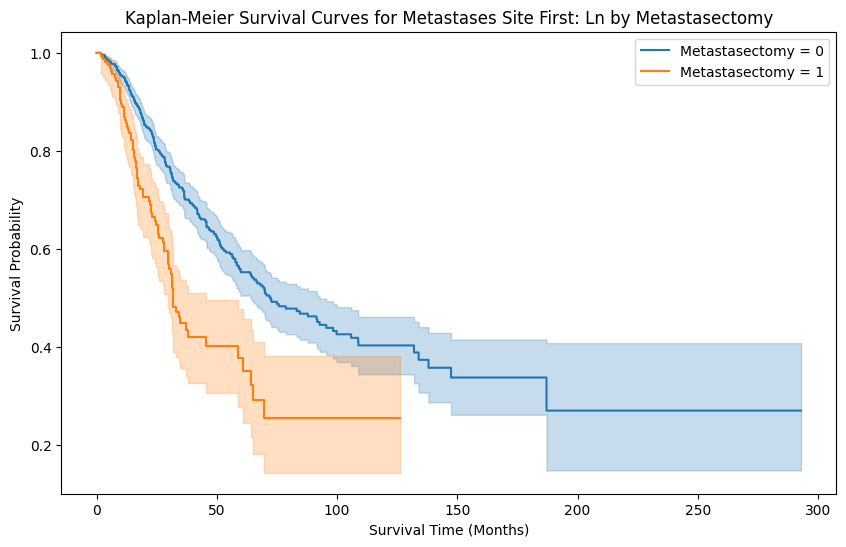

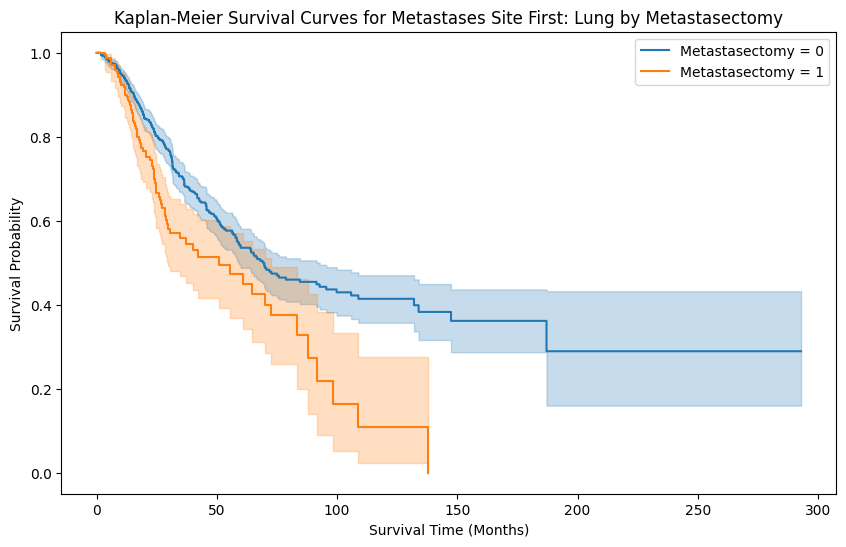

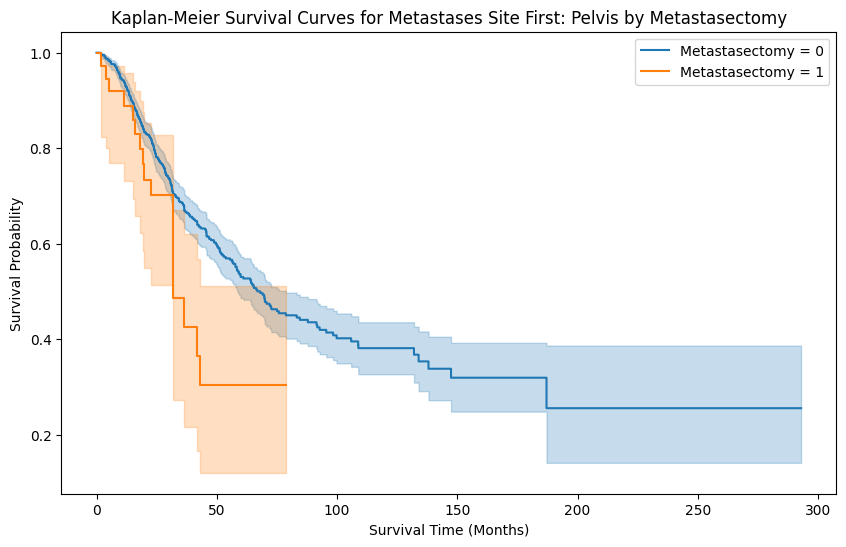

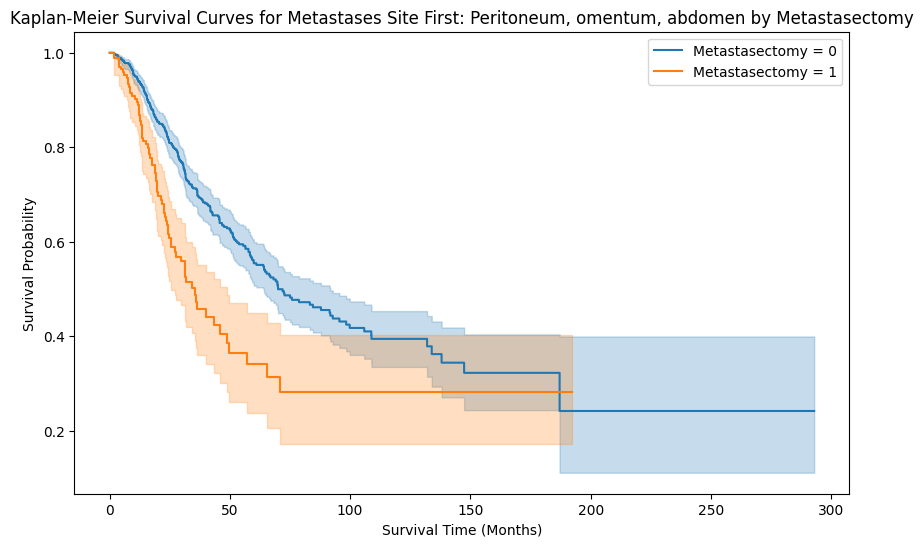

In [ ]:
# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Loop through each metastatic site
metastasis_columns = [col for col in df_cleaned.columns if 'Metastases Site First' in col]

# Loop through each metastatic site and plot Kaplan-Meier curves for metastasectomy
for metastasis_column in metastasis_columns:
    plt.figure(figsize=(10, 6))  # Create a new figure for each metastatic site

    for value in [0, 1]:  # 0 = No, 1 = Yes for Metastasectomy
        # Filter data for metastasectomy status and the current metastatic site
        kmf.fit(df_cleaned.loc[(df_cleaned[metastasis_column] == value), 'Overall Survival (Months)'],
                event_observed=df_cleaned.loc[(df_cleaned[metastasis_column] == value), 'Overall Survival Status'],
                label=f'Metastasectomy = {value}')
        kmf.plot()

    # Add titles and labels
    plt.title(f'Kaplan-Meier Survival Curves for {metastasis_column} by Metastasectomy')
    plt.xlabel('Survival Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show()


In [ ]:
# Step 1: Create new dataframe for Cox Model
metastasis_columns = [col for col in df_cleaned.columns if 'Metastases Site First' in col]

cox_data = df_cleaned[['Age at Diagnosis', 'Metastasectomy', 'Stage At Diagnosis', 'Sex',
                       'Overall Survival (Months)', 'Overall Survival Status'] + metastasis_columns]

# Step 2: Encode categorical variables to numeric (dummy variables)
cox_data = pd.get_dummies(cox_data, columns=['Stage At Diagnosis', 'Sex'], drop_first=True)

# Step 3: Ensure no missing data
cox_data = cox_data.dropna()


In [ ]:
from lifelines import CoxPHFitter

# Step 4: Initialize and fit Cox model
cph = CoxPHFitter()
cph.fit(cox_data, duration_col='Overall Survival (Months)', event_col='Overall Survival Status')

# Step 5: Print the summary
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 1013 total observations, 649 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 1013
number of events observed = 364
   partial log-likelihood = -2081.15
         time fit was run = 2025-05-27 19:02:39 UTC

---
                                                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                            
Age at Diagnosis                                     0.01      1.01      0.00           -0.00            0.01                1.00                1.01
Metastasectomy                                      -1.95      0.14      0.14           -2.22           -1.68                0.11                0.19
Metastases Site First: Bone                          0.61      1.84      0.36           -0.09            1.31                0.91                3.72
Metastases Site First: Brain                         0.53      1.71      0.73           -0.89            1.96                0.41                7.09
Metastases Site First: Gynecological                 0.44      1.55      0.24           -0.03            0.91                0.97                2.49
Metastases Site First: Liver                         0.21      1.24      0.15           -0.08            0.51                0.92                1.66
Metastases Site First: Ln                            0.16      1.17      0.14           -0.11            0.43                0.89                1.53
Metastases Site First: Lung                          0.10      1.10      0.14           -0.18            0.37                0.84                1.45
Metastases Site First: Pelvis                        0.47      1.59      0.26           -0.04            0.97                0.96                2.65
Metastases Site First: Peritoneum, omentum, abdomen  0.25      1.28      0.15           -0.05            0.55                0.95                1.73
Stage At Diagnosis_II                                0.02      1.02      0.41           -0.79            0.83                0.45                2.29
Stage At Diagnosis_III                               0.22      1.25      0.37           -0.50            0.95                0.61                2.57
Stage At Diagnosis_IV                                0.21      1.23      0.34           -0.46            0.88                0.63                2.42
Sex_Male                                             0.01      1.01      0.11           -0.21            0.23                0.81                1.26

                                                     cmp to      z      p  -log2(p)
covariate                                                                          
Age at Diagnosis                                       0.00   1.18   0.24      2.07
Metastasectomy                                         0.00 -14.06 <0.005    146.83
Metastases Site First: Bone                            0.00   1.70   0.09      3.48
Metastases Site First: Brain                           0.00   0.74   0.46      1.11
Metastases Site First: Gynecological                   0.00   1.82   0.07      3.87
Metastases Site First: Liver                           0.00   1.41   0.16      2.65
Metastases Site First: Ln                              0.00   1.13   0.26      1.95
Metastases Site First: Lung                            0.00   0.68   0.50      1.01
Metastases Site First: Pelvis                          0.00   1.80   0.07      3.81
Metastases Site First: Peritoneum, omentum, abdomen    0.00   1.61   0.11      3.23
Stage At Diagnosis_II                                  0.00   0.04   0.97      0.05
Stage At Diagnosis_III                                 0.00   0.61   0.54      0.89
Stage At Diagnosis_IV   

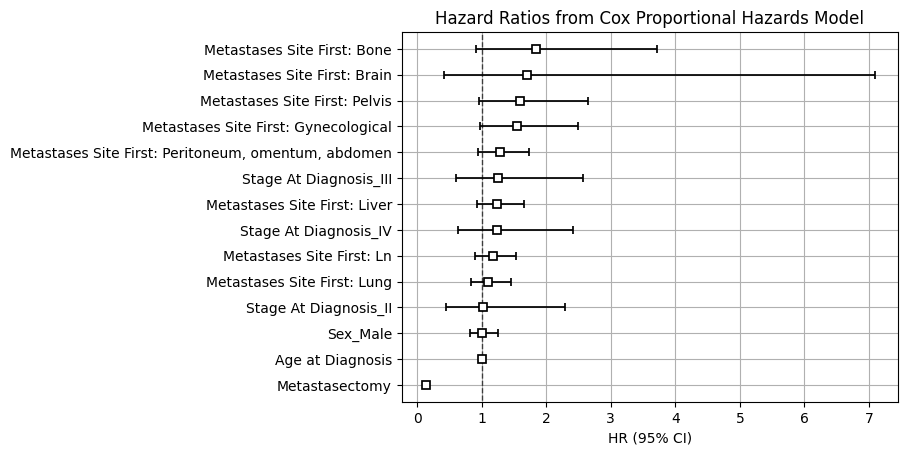

In [ ]:
cph.plot(hazard_ratios=True)
plt.title("Hazard Ratios from Cox Proportional Hazards Model")
plt.grid(True)
plt.show()


In [ ]:
cph.check_assumptions(cox_data, p_value_threshold=0.05)


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1013 total observations, 649 right-censored observations>
         test_name = proportional_hazard_test

---
                                                          test_statistic    p  -log2(p)
Age at Diagnosis                                    km              0.12 0.72      0.47
                                                    rank            0.00 0.95      0.08
Metastasectomy                                      km              5.93 0.01      6.07
                                                    rank            5.56 0.02      5.76
Metastases Site First: Bone                         km              0.01 0.91      0.14
                                                    rank            0.00 0.96      0.05
Metastases Site First: Brain                        km              0.08 0.78      0.36
                                                    rank            0.25 0.62      0.69
Metastases Site First: Gynecological                km              2.03 0.15      2.70
                                                    rank            1.51 0.22      2.19
Metastases Site First: Liver                        km              0.07 0.80      0.33
                                                    rank            0.17 0.68      0.55
Metastases Site First: Ln                           km              0.24 0.62      0.68
                                                    rank            0.19 0.66      0.60
Metastases Site First: Lung                         km              0.32 0.57      0.80
                                                    rank            0.17 0.68      0.55
Metastases Site First: Pelvis                       km              0.24 0.62      0.69
                                                    rank            0.46 0.50      1.00
Metastases Site First: Peritoneum, omentum, abdomen km              4.37 0.04      4.78
                                                    rank            3.13 0.08      3.71
Sex_Male                                            km              2.12 0.15      2.78
                                                    rank            1.61 0.20      2.29
Stage At Diagnosis_II                               km              0.52 0.47      1.08
                                                    rank            0.52 0.47      1.08
Stage At Diagnosis_III                              km              0.00 1.00      0.00
                                                    rank            0.03 0.86      0.22
Stage At Diagnosis_IV                               km              0.01 0.91      0.14
                                                    rank            0.15 0.70      0.52



1. Variable 'Metastasectomy' failed the non-proportional test: p-value is 0.0149.

   Advice: with so few unique values (only 2), you can include `strata=['Metastasectomy', ...]` in
the call in `.fit`. See documentation in link [E] below.

2. Variable 'Metastases Site First: Peritoneum, omentum, abdomen' failed the non-proportional test: p-value is 0.0365.

   Advice: with so few unique values (only 2), you can include `strata=['Metastases Site First:
Peritoneum, omentum, abdomen', ...]` in the call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_

[]

In [ ]:
# Filter patients who had metastasectomy
metastasectomy_patients = df_cleaned[df_cleaned['Metastasectomy'] == 1]

# Mortality count (1 = died, 0 = alive)
mortality_counts = metastasectomy_patients['Overall Survival Status'].value_counts()

# Calculate mortality rate
mortality_rate = (mortality_counts[1] / len(metastasectomy_patients)) * 100
survival_rate = (mortality_counts[0] / len(metastasectomy_patients)) * 100

print("📊 Mortality and Survival among Patients with Metastasectomy:")
print(f"  👉 Total Patients: {len(metastasectomy_patients)}")
print(f"  ⚰️ Died (1): {mortality_counts[1]} ({mortality_rate:.2f}%)")
print(f"  💚 Survived (0): {mortality_counts[0]} ({survival_rate:.2f}%)")

# 🔎 Mortality per Metastatic Site (only for metastasectomy patients)
print("\n🔍 Mortality by Metastatic Site (in Metastasectomy group):")
metastasis_columns = [col for col in df_cleaned.columns if 'Metastases Site First' in col]

for site in metastasis_columns:
    site_subset = metastasectomy_patients[metastasectomy_patients[site] == 1]
    if len(site_subset) == 0:
        continue
    deaths = site_subset['Overall Survival Status'].sum()
    total = len(site_subset)
    rate = (deaths / total) * 100
    print(f"  {site}: {deaths}/{total} deaths ({rate:.2f}%)")


📊 Mortality and Survival among Patients with Metastasectomy:
  👉 Total Patients: 488
  ⚰️ Died (1): 93 (19.06%)
  💚 Survived (0): 395 (80.94%)

🔍 Mortality by Metastatic Site (in Metastasectomy group):
  Metastases Site First: Brain: 0/1 deaths (0.00%)
  Metastases Site First: Gynecological: 8/28 deaths (28.57%)
  Metastases Site First: Liver: 73/383 deaths (19.06%)
  Metastases Site First: Ln: 5/28 deaths (17.86%)
  Metastases Site First: Lung: 9/46 deaths (19.57%)
  Metastases Site First: Pelvis: 5/14 deaths (35.71%)
  Metastases Site First: Peritoneum, omentum, abdomen: 11/52 deaths (21.15%)


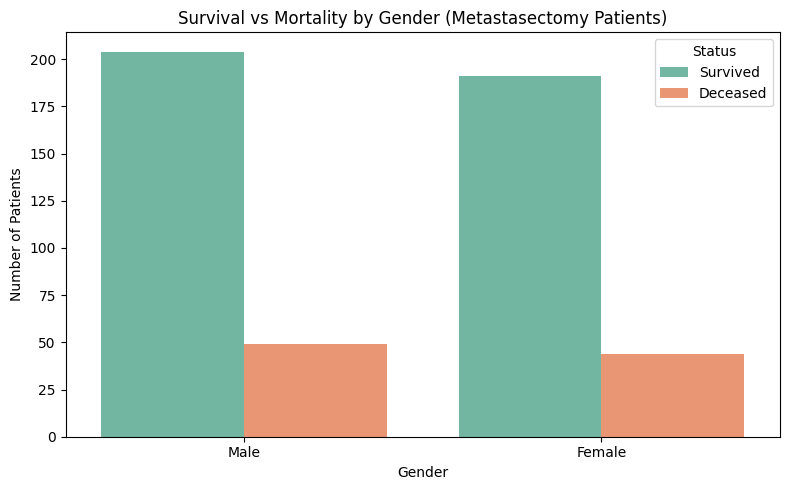

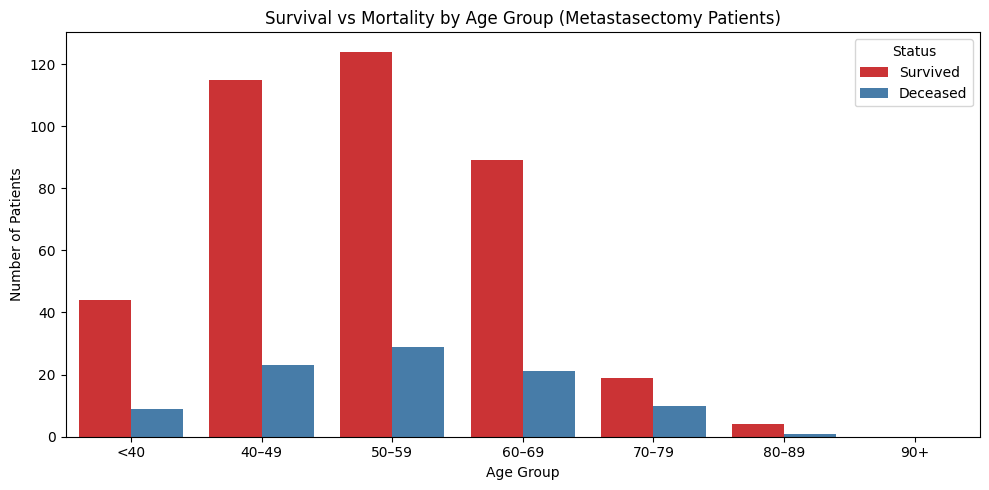

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only patients who had metastasectomy
df_meta = df_cleaned[df_cleaned['Metastasectomy'] == 1].copy()

# Map survival status for clarity
df_meta['Survival Label'] = df_meta['Overall Survival Status'].map({1: 'Deceased', 0: 'Survived'})

# ----------------- 🎨 Plot 1: Gender-wise Survival --------------
plt.figure(figsize=(8, 5))
sns.countplot(data=df_meta, x='Sex', hue='Survival Label', palette='Set2')
plt.title('Survival vs Mortality by Gender (Metastasectomy Patients)')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# ----------------- 🎨 Plot 2: Age Group-wise Survival --------------
# Bin ages into groups (e.g. <40, 40–49, 50–59, etc.)
age_bins = [0, 39, 49, 59, 69, 79, 89, 100]
age_labels = ['<40', '40–49', '50–59', '60–69', '70–79', '80–89', '90+']
df_meta['Age Group'] = pd.cut(df_meta['Age at Diagnosis'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 5))
sns.countplot(data=df_meta, x='Age Group', hue='Survival Label', palette='Set1')
plt.title('Survival vs Mortality by Age Group (Metastasectomy Patients)')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


<ipython-input-25-ee66bc250f9c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_metsurg.groupby(['Sex', 'Age Group'])['Overall Survival Status'].value_counts(normalize=True).unstack().fillna(0) * 100


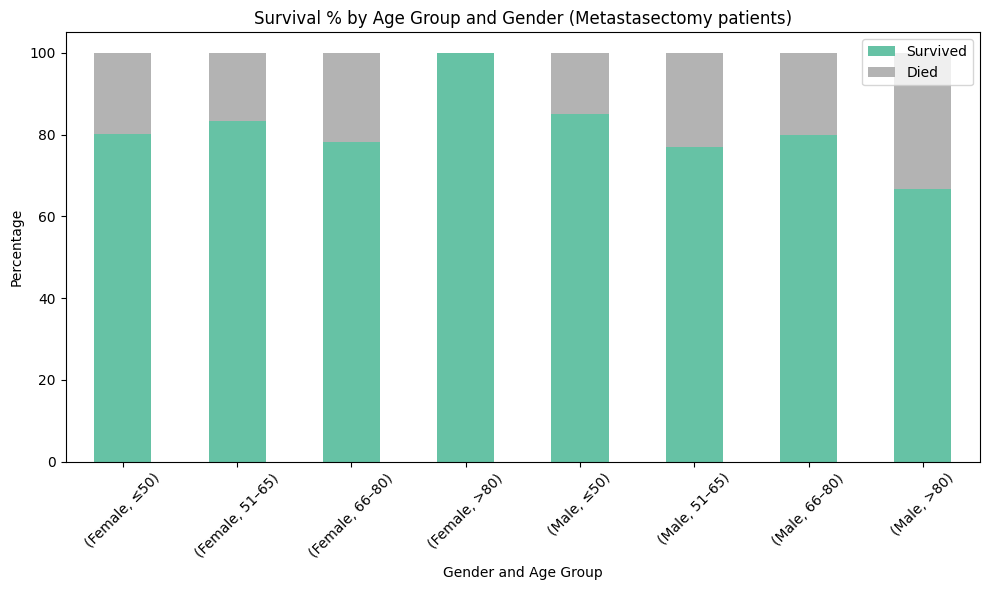

In [ ]:
# Age bins
df_metsurg = df_cleaned[df_cleaned['Metastasectomy'] == 1].copy()
df_metsurg['Age Group'] = pd.cut(df_metsurg['Age at Diagnosis'], bins=[0,50,65,80,100],
                                 labels=['≤50','51–65','66–80','>80'])

# Grouped survival counts
summary = df_metsurg.groupby(['Sex', 'Age Group'])['Overall Survival Status'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot
summary.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Survival % by Age Group and Gender (Metastasectomy patients)')
plt.ylabel('Percentage')
plt.xlabel('Gender and Age Group')
plt.legend(['Survived', 'Died'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Only metastasis columns
metastasis_cols = [col for col in df_cleaned.columns if 'Metastases Site First' in col]

# Melt to long format: each row = one site per patient
df_melted = df_cleaned.melt(id_vars=['Patient ID', 'Sex', 'Age at Diagnosis', 'Metastasectomy',
                                     'Overall Survival (Months)', 'Overall Survival Status'],
                            value_vars=metastasis_cols,
                            var_name='Metastatic Site',
                            value_name='Has Metastasis')

# Filter only rows where metastasis occurred
df_melted = df_melted[df_melted['Has Metastasis'] == 1].drop(columns='Has Metastasis')

df_melted.head()


,Patient ID,Sex,Age at Diagnosis,Metastasectomy,Overall Survival (Months),Overall Survival Status,Metastatic Site
174,P-0002512,Male,55,0,20.67,1,Metastases Site First: Bone
215,P-0003130,Male,31,0,12.90,1,Metastases Site First: Bone
217,P-0003154,Female,48,0,16.90,1,Metastases Site First: Bone
347,P-0005172,Male,59,0,4.47,0,Metastases Site First: Bone
510,P-0006981,Male,38,0,24.10,1,Metastases Site First: Bone


In [ ]:
mortality_by_site = df_melted.groupby('Metastatic Site')['Overall Survival Status'].value_counts(normalize=True).unstack() * 100
mortality_by_site.columns = ['Survived (%)', 'Died (%)']
mortality_by_site.sort_values('Died (%)', ascending=False)


,Survived (%),Died (%)
Metastatic Site,,
Metastases Site First: Bone,47.368421,52.631579
Metastases Site First: Ln,51.234568,48.765432
Metastases Site First: Pelvis,54.054054,45.945946
"Metastases Site First: Peritoneum, omentum, abdomen",56.395349,43.604651
Metastases Site First: Lung,56.497175,43.502825
Metastases Site First: Gynecological,56.862745,43.137255
Metastases Site First: Brain,60.000000,40.000000
Metastases Site First: Liver,63.598901,36.401099


In [ ]:
# Filter only patients with metastasectomy
df_metsurg = df_cleaned[df_cleaned['Metastasectomy'] == 1].copy()

# Identify metastasis site columns
metastasis_cols = [col for col in df_metsurg.columns if 'Metastases Site First' in col]

# Melt to long format
df_melted = df_metsurg.melt(
    id_vars=['Patient ID', 'Sex', 'Age at Diagnosis', 'Overall Survival (Months)', 'Overall Survival Status'],
    value_vars=metastasis_cols,
    var_name='Metastatic Site',
    value_name='Has Metastasis'
)

# Keep only rows where metastasis is present
df_melted = df_melted[df_melted['Has Metastasis'] == 1]


<ipython-input-29-b457bbc71755>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mortality_stats.values, y=mortality_stats.index, palette='Reds_r')
<ipython-input-29-b457bbc71755>:15: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


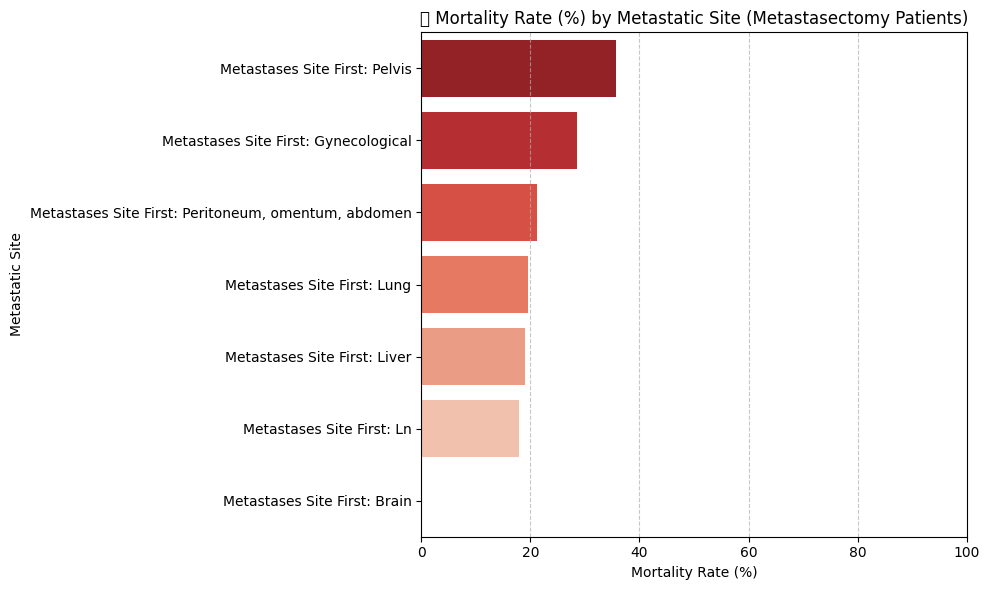

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mortality rate per site
mortality_stats = df_melted.groupby('Metastatic Site')['Overall Survival Status'].mean().sort_values(ascending=False) * 100

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=mortality_stats.values, y=mortality_stats.index, palette='Reds_r')
plt.title('🧠 Mortality Rate (%) by Metastatic Site (Metastasectomy Patients)')
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Metastatic Site')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-30-4293542d4ef5>:36: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


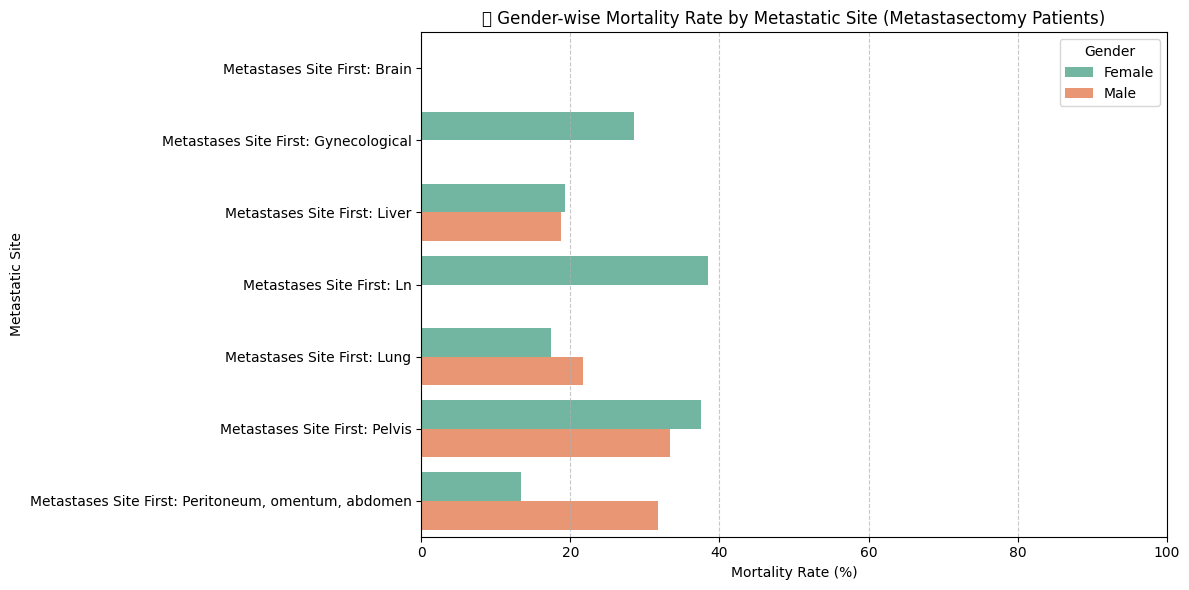

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter metastasectomy patients
df_metsurg = df_cleaned[df_cleaned['Metastasectomy'] == 1].copy()

# Step 2: Melt long format for metastasis site
metastasis_cols = [col for col in df_metsurg.columns if 'Metastases Site First' in col]
df_melted = df_metsurg.melt(
    id_vars=['Patient ID', 'Sex', 'Age at Diagnosis', 'Overall Survival (Months)', 'Overall Survival Status'],
    value_vars=metastasis_cols,
    var_name='Metastatic Site',
    value_name='Has Metastasis'
)
df_melted = df_melted[df_melted['Has Metastasis'] == 1]

# Step 3: Group and calculate mortality rate by site and gender
grouped = df_melted.groupby(['Metastatic Site', 'Sex'])['Overall Survival Status'].mean().reset_index()
grouped['Mortality Rate (%)'] = grouped['Overall Survival Status'] * 100

# Step 4: Barplot with hue for gender
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='Mortality Rate (%)',
    y='Metastatic Site',
    hue='Sex',
    palette='Set2'
)
plt.title('🧠 Gender-wise Mortality Rate by Metastatic Site (Metastasectomy Patients)')
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Metastatic Site')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


<ipython-input-31-a013354b7d64>:23: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


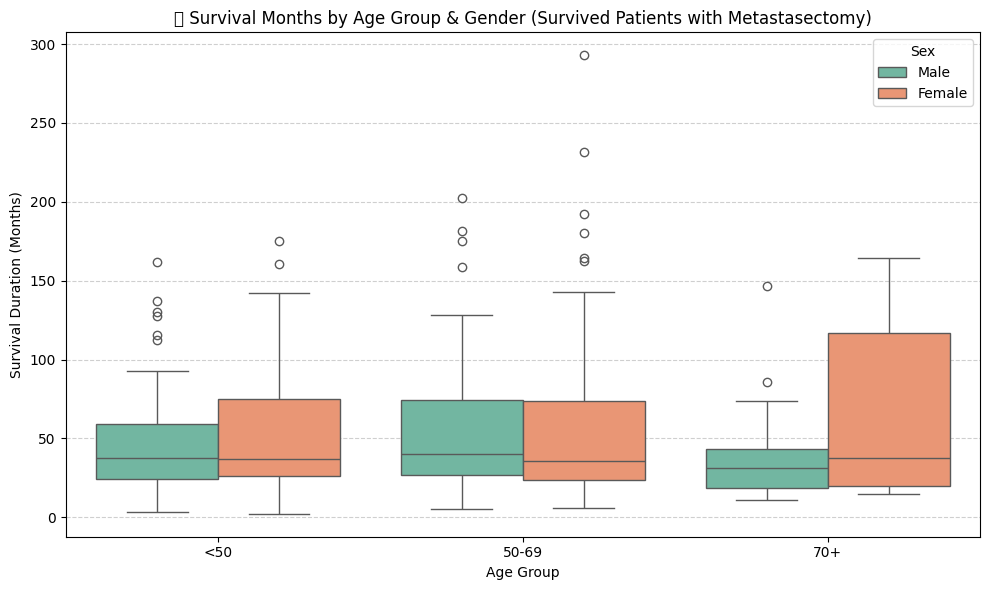

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter patients who had metastasectomy and survived
df_survived = df_cleaned[
    (df_cleaned['Metastasectomy'] == 1) &
    (df_cleaned['Overall Survival Status'] == 0)
].copy()

# Step 2: Create age group bins
bins = [0, 49, 69, 100]
labels = ['<50', '50-69', '70+']
df_survived['Age Group'] = pd.cut(df_survived['Age at Diagnosis'], bins=bins, labels=labels, right=True)

# Step 3: Plot boxplot of survival months by age group and gender
plt.figure(figsize=(10,6))
sns.boxplot(data=df_survived, x='Age Group', y='Overall Survival (Months)', hue='Sex', palette='Set2')
plt.title('🎯 Survival Months by Age Group & Gender (Survived Patients with Metastasectomy)')
plt.xlabel('Age Group')
plt.ylabel('Survival Duration (Months)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-32-791cf7599d9d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_summary = df_survived.groupby(['Sex', 'Age Group'])['Overall Survival (Months)'].mean().reset_index()
<ipython-input-32-791cf7599d9d>:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


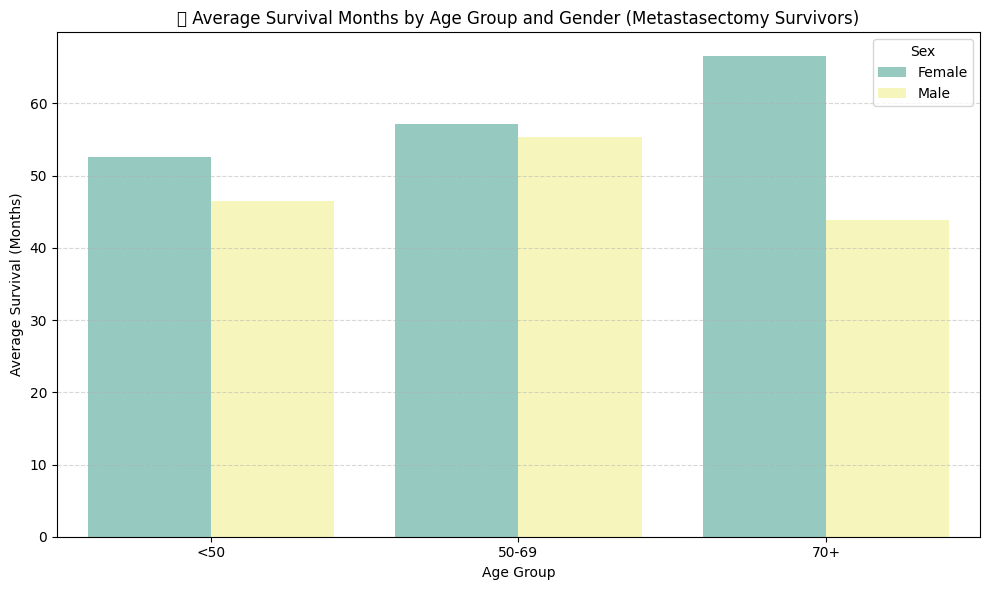

In [ ]:
# Step: Group and calculate mean survival
survival_summary = df_survived.groupby(['Sex', 'Age Group'])['Overall Survival (Months)'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=survival_summary, x='Age Group', y='Overall Survival (Months)', hue='Sex', palette='Set3')
plt.title('📊 Average Survival Months by Age Group and Gender (Metastasectomy Survivors)')
plt.xlabel('Age Group')
plt.ylabel('Average Survival (Months)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-33-45c430dd920b>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_survived.pivot_table(
<ipython-input-33-45c430dd920b>:12: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


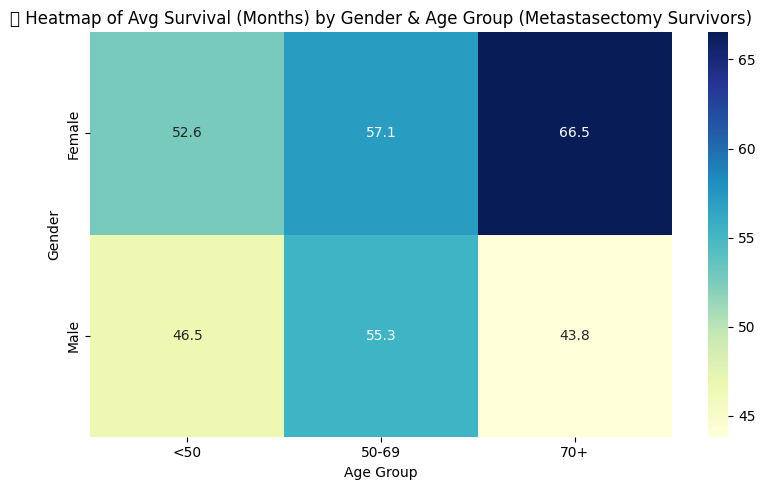

In [ ]:
# Pivot the data for heatmap
heatmap_data = df_survived.pivot_table(
    index='Sex', columns='Age Group', values='Overall Survival (Months)', aggfunc='mean'
)

# Plot
plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('🔥 Heatmap of Avg Survival (Months) by Gender & Age Group (Metastasectomy Survivors)')
plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


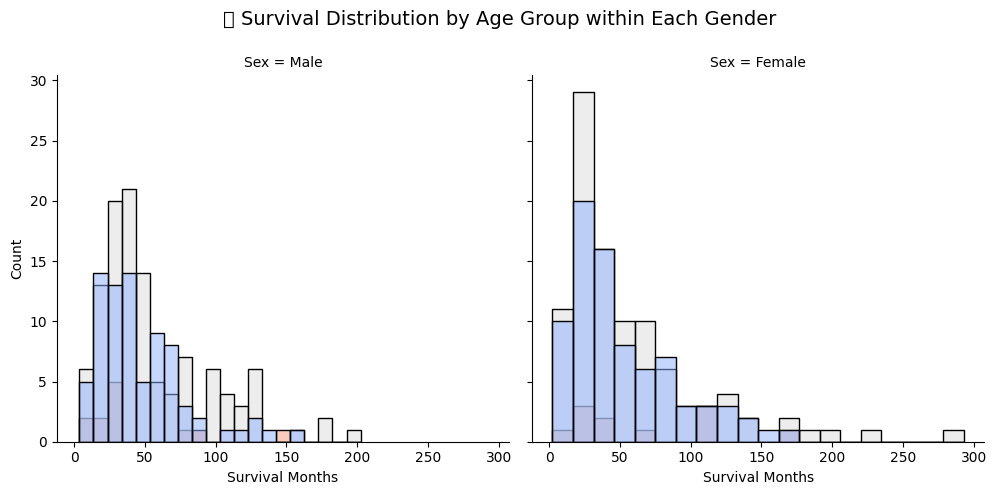

In [ ]:
# Import if needed
from seaborn import FacetGrid

# Plot
g = sns.FacetGrid(df_survived, col='Sex', height=5, aspect=1)
g.map_dataframe(sns.histplot, x='Overall Survival (Months)', hue='Age Group', bins=20, palette='coolwarm')
g.add_legend()
g.set_axis_labels('Survival Months', 'Count')
g.fig.suptitle('📊 Survival Distribution by Age Group within Each Gender', fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()


📊 Survival Status Counts:
 Overall Survival Status
0:LIVING      371
1:DECEASED    274
Name: count, dtype: int64

📉 Survival Time (Months) - for deceased without metastasectomy:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Overall Survival (Months), dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


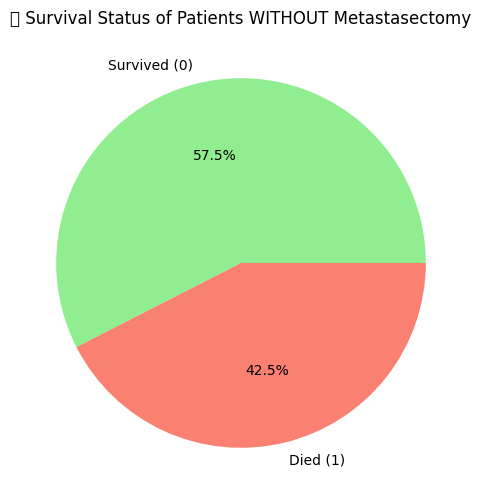

In [ ]:
# Filter non-metastasectomy group
no_metastasectomy = df[df['Metastasectomy'] == 0]

# Calculate survival stats
status_counts = no_metastasectomy['Overall Survival Status'].value_counts()
status_percentages = status_counts / status_counts.sum() * 100

# For those who died
no_metast_deceased = no_metastasectomy[no_metastasectomy['Overall Survival Status'] == 1]
survival_stats_no_metast = no_metast_deceased['Overall Survival (Months)'].describe()

# Print
print("📊 Survival Status Counts:\n", status_counts)
print("\n📉 Survival Time (Months) - for deceased without metastasectomy:\n", survival_stats_no_metast)

# Pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(
    status_percentages,
    labels=['Survived (0)', 'Died (1)'],
    autopct='%1.1f%%',
    colors=['lightgreen', 'salmon']
)
plt.title('🩺 Survival Status of Patients WITHOUT Metastasectomy')
plt.show()


<ipython-input-38-95b828860527>:34: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


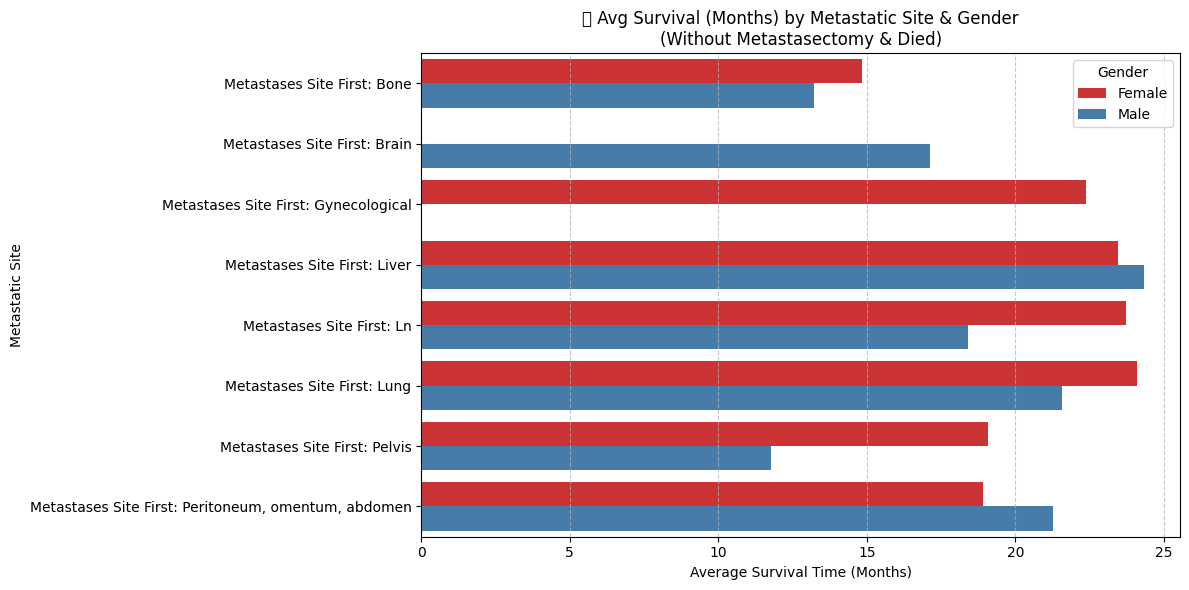

In [ ]:
# Filter: Non-metastasectomy & deceased patients
df_no_metast = df_cleaned[(df_cleaned['Metastasectomy'] == 0) & (df_cleaned['Overall Survival Status'] == 1)].copy()

# Melt to long format
metastasis_cols = [col for col in df_no_metast.columns if 'Metastases Site First' in col]
df_melted_no = df_no_metast.melt(
    id_vars=['Patient ID', 'Sex', 'Age at Diagnosis', 'Overall Survival (Months)'],
    value_vars=metastasis_cols,
    var_name='Metastatic Site',
    value_name='Has Metastasis'
)
df_melted_no = df_melted_no[df_melted_no['Has Metastasis'] == 1]

# Group by Metastatic Site and Gender: Calculate Avg Survival Time
grouped_no = df_melted_no.groupby(['Metastatic Site', 'Sex'])['Overall Survival (Months)'].mean().reset_index()

# Rename column for clarity
grouped_no.rename(columns={'Overall Survival (Months)': 'Avg Survival (Months)'}, inplace=True)

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_no,
    x='Avg Survival (Months)',
    y='Metastatic Site',
    hue='Sex',
    palette='Set1'
)
plt.title('📉 Avg Survival (Months) by Metastatic Site & Gender\n(Without Metastasectomy & Died)')
plt.xlabel('Average Survival Time (Months)')
plt.ylabel('Metastatic Site')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [ ]:
print(df_survived.columns.tolist())


['Patient ID', 'Age at Diagnosis', 'Metastasectomy', 'Metastases Site First: Bone', 'Metastases Site First: Brain', 'Metastases Site First: Gynecological', 'Metastases Site First: Liver', 'Metastases Site First: Ln', 'Metastases Site First: Lung', 'Metastases Site First: Pelvis', 'Metastases Site First: Peritoneum, omentum, abdomen', 'Overall Survival Status', 'Stage At Diagnosis', 'Sex', 'Overall Survival (Months)']


<ipython-input-41-698f9e189ab6>:20: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


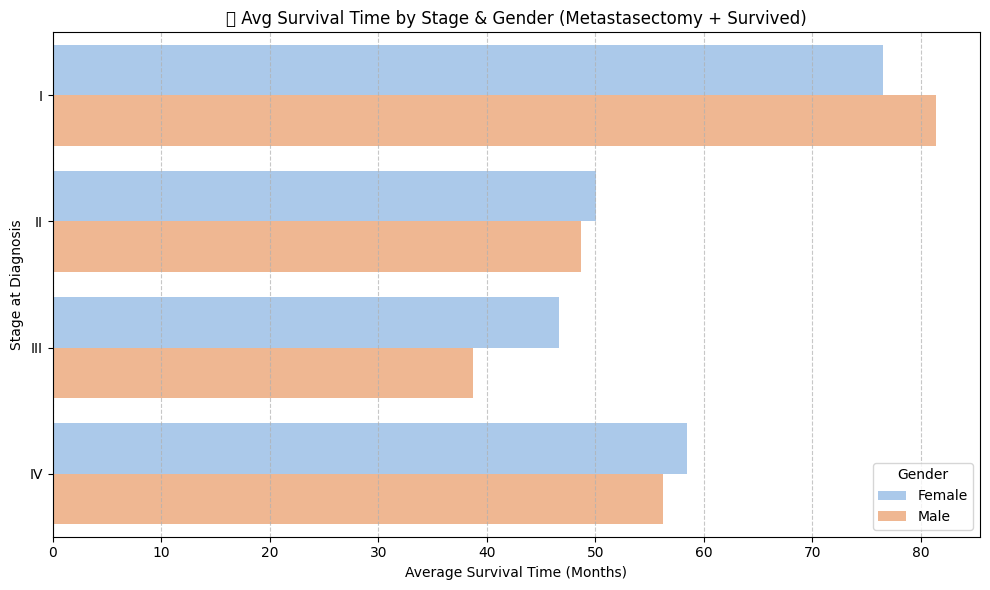

In [ ]:
grouped_survival = df_survived.groupby(['Stage At Diagnosis', 'Sex'])['Overall Survival (Months)'].mean().reset_index()
grouped_survival.rename(columns={'Overall Survival (Months)': 'Avg Survival (Months)'}, inplace=True)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_survival,
    x='Avg Survival (Months)',
    y='Stage At Diagnosis',
    hue='Sex',
    palette='pastel'
)
plt.title('🎯 Avg Survival Time by Stage & Gender (Metastasectomy + Survived)')
plt.xlabel('Average Survival Time (Months)')
plt.ylabel('Stage at Diagnosis')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Gender')
plt.show()


<ipython-input-42-a33ac22d60fd>:24: UserWarning: Glyph 128367 (\N{CANDLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128367 (\N{CANDLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


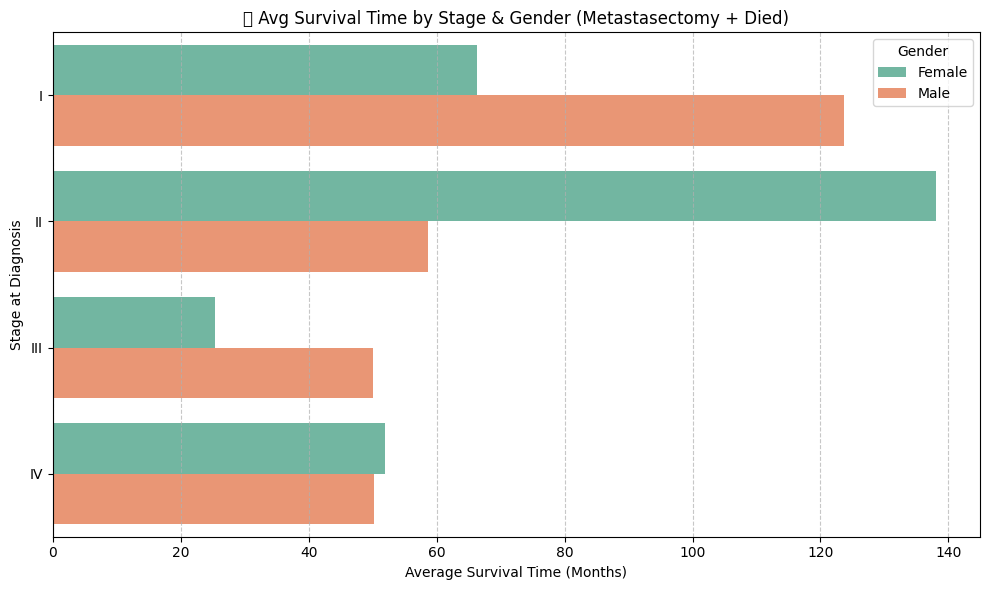

In [ ]:
# Step 1: Filter patients who had metastasectomy but died
df_died = df_cleaned[(df_cleaned['Metastasectomy'] == 1) & (df_cleaned['Overall Survival Status'] == 1)]

# Step 2: Group by Stage and Gender, calculate average survival time
grouped_died = df_died.groupby(['Stage At Diagnosis', 'Sex'])['Overall Survival (Months)'].mean().reset_index()
grouped_died.rename(columns={'Overall Survival (Months)': 'Avg Survival (Months)'}, inplace=True)

# Step 3: Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_died,
    x='Avg Survival (Months)',
    y='Stage At Diagnosis',
    hue='Sex',
    palette='Set2'
)
plt.title('🕯️ Avg Survival Time by Stage & Gender (Metastasectomy + Died)')
plt.xlabel('Average Survival Time (Months)')
plt.ylabel('Stage at Diagnosis')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Gender')
plt.show()
